<a href="https://colab.research.google.com/github/danijak/Geosciences/blob/main/EAGE_fmi_dataset_create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#dependencies
! pip install dlisio

In [ ]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import dlisio
import pandas as pd
import numpy as np


In [ ]:
#loading data .dlis format
f, *f_tail = dlisio.load('University_of_Utah_MU_ESW1_FMI_HD_2226_7550ft_Run1.dlis')

if len(f_tail): logging.warning('There are more logical files in tail')

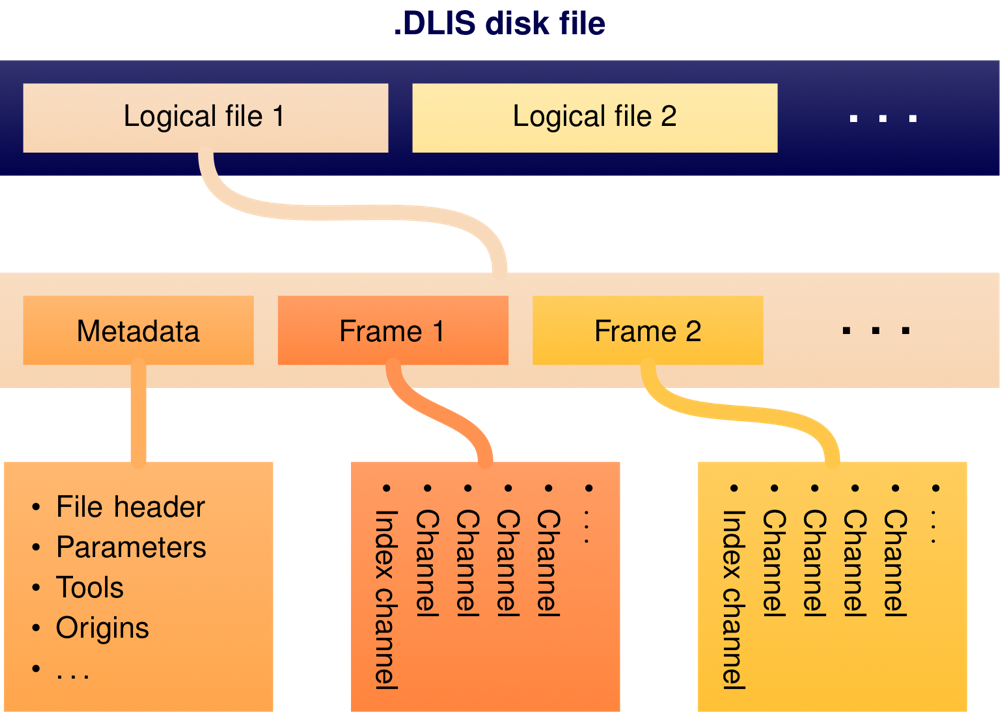

In [ ]:
#list of origins
origin, *origin_tail = f.origins

if len(origin_tail): logging.warning('f contains multiple origins')

In [ ]:
# header
f.describe()

------------
Logical File
------------
Description : logicalfile(ConPr_R01_L001Up_FMI_DLIS_Custom)
Frames      : 1
Channels    : 19

Known objects
--
FILE-HEADER : 1
ORIGIN      : 2
PARAMETER   : 846
CHANNEL     : 19
TOOL        : 2
FRAME       : 1

Unknown objects
--
440-CHANNEL-PARAMETER : 89


In [ ]:
# origin  header details
origin.describe()

------
Origin
------
name   : WELL-MU-ESW1
origin : 52
copy   : 0

Logical file ID          : ConPr_R01_L001Up_FMI_DLIS_Custom
File set name and number : CONPR_R01_L001UP_FMI_DLIS_CUSTOM / 1
File number and type     : 0 / CUSTOMER

Field                   : None
Well (id/name)          :  / MU-ESW1
Produced by (code/name) : 440 / Schlumberger
Produced for            : University of Utah
Created                 : 2017-10-26 18:41:24

Created by              : Techlog, (version: 2013.4.0 (rev: 128578))
Other programs/services : WELL-MU-ESW1


In [ ]:
# List of all the channels/attribute
channel=f.channels
channel

[Channel(TDEP),
 Channel(AX),
 Channel(AY),
 Channel(AZ),
 Channel(BS),
 Channel(C1_S),
 Channel(C2_S),
 Channel(DEVIM_S),
 Channel(FMI_DYN),
 Channel(FMI_STAT),
 Channel(FX),
 Channel(FY),
 Channel(FZ),
 Channel(GR_EDTC_S),
 Channel(HAZIM_S),
 Channel(P1AZ),
 Channel(P1NO_FBST_S),
 Channel(RB_FBST_S),
 Channel(TENS)]

In [ ]:
#List of frames
frame=f.frames
frame

[Frame(1B)]

In [ ]:
#List of tools
tool=f.tools
tool

[Tool(EDTCB), Tool(FBST-E)]

In [ ]:
#List of parameters
parameter=f.parameters
parameter

[Parameter(SGOR),
 Parameter(MVIS),
 Parameter(MDEC),
 Parameter(SEABDEPTH),
 Parameter(TOWN),
 Parameter(RUPI),
 Parameter(EAE),
 Parameter(IBG),
 Parameter(MATR),
 Parameter(ODD),
 Parameter(OVERIDE_MAGDIP),
 Parameter(BPP),
 Parameter(MDEN),
 Parameter(BPT),
 Parameter(DTMUD_RM),
 Parameter(RUN),
 Parameter(TD_ACAUX),
 Parameter(IHVC),
 Parameter(INCLUDE-PARALLELDATA),
 Parameter(FILE-SET-NAME),
 Parameter(VHOL),
 Parameter(MW_RM),
 Parameter(GENERIC-NAME),
 Parameter(DLAB),
 Parameter(STEM),
 Parameter(ZRCS),
 Parameter(FEXP),
 Parameter(IHVS),
 Parameter(ECF),
 Parameter(DEPREM1),
 Parameter(RWF),
 Parameter(DEPREM2),
 Parameter(MST_RM),
 Parameter(LUL),
 Parameter(DEPREM3),
 Parameter(HILT_GAS_DENSITY),
 Parameter(DEPREM4),
 Parameter(LUN),
 Parameter(GDD),
 Parameter(TD_TOLERANCE_LEVEL),
 Parameter(TWS),
 Parameter(ENGI),
 Parameter(LCSN),
 Parameter(PCIDDRL),
 Parameter(RWS),
 Parameter(A),
 Parameter(DTF),
 Parameter(EDF),
 Parameter(DESCRIPTION),
 Parameter(TBGD),
 Parameter(

In [ ]:
# To check the values of any specific channel
channel = f.object('CHANNEL', 'FMI_STAT')
print(channel.long_name)
print(channel.describe())
curve=channel.curves()
print(curve)

Button Resistivity profile corrected for gain and EMEX, Pad A Row 1
-------
Channel
-------
name   : FMI_STAT
origin : 53
copy   : 0

Description : Button Resistivity profile corrected for gain and EMEX, Pad A Row
              1

Sample dimensions         : 360
Maximum sample dimensions : 360
Property indicators       : 440-CUSTOMER


[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]


In [ ]:
#to check the value of any specific frames
frame=f.object('FRAME','1B')
print(frame.channels)
print(frame.describe())
curves = frame.curves()
print(curves)

[Channel(TDEP), Channel(AX), Channel(AY), Channel(AZ), Channel(BS), Channel(C1_S), Channel(C2_S), Channel(DEVIM_S), Channel(FMI_DYN), Channel(FMI_STAT), Channel(FX), Channel(FY), Channel(FZ), Channel(GR_EDTC_S), Channel(HAZIM_S), Channel(P1AZ), Channel(P1NO_FBST_S), Channel(RB_FBST_S), Channel(TENS)]
-----
Frame
-----
name   : 1B
origin : 23
copy   : 0

Channel indexing
--
Indexed by       : BOREHOLE-DEPTH
Index units      : 0.1 in
Index min        : 878344.9613070488 [0.1 in]
Index max        : 906940.9378695488 [0.1 in]
Direction        : DECREASING
Constant spacing : -1.0 [0.1 in]
Index channel    : Channel(TDEP)

Channels
--
TDEP        AX          AY          AZ          BS          C1_S        C2_S
DEVIM_S     FMI_DYN     FMI_STAT    FX          FY          FZ
GR_EDTC_S   HAZIM_S     P1AZ        P1NO_FBST_S RB_FBST_S   TENS

[(    1, 906940.93786955, -9999., -9999., -9999., 8.75, -9999., -9999.,  3.0260234e+00, [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -999

In [ ]:
#complete data of the dlis file
print(curves)

[(    1, 906940.93786955, -9999., -9999., -9999., 8.75, -9999., -9999.,  3.0260234e+00, [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.,

In [ ]:
#saving data as npy
np.save('data_run1_numpy.npy',curves)

In [ ]:
#converting data to pandas dataframe
channel_name=['AX','AY', 'AZ','BS','C1_S','C2_S','DEVIM_S','FX','FY','FZ','GR_EDTC_S','HAZIM_S','P1AZ','P1NO_FBST_S','RB_FBST_S','TENS']
df = pd.DataFrame( {'TDEP':f.object('CHANNEL', 'TDEP').curves()})
for c in channel_name:
  df[c]= f.object('CHANNEL', c).curves()


  


In [ ]:
#saving data in csv file
df.to_csv('data_run1.csv')

In [ ]:
#arr= f.object('CHANNEL', 'FMI_STAT').curves()
#df['FMI_STAT'] = arr.tolist()

In [ ]:
#arr= f.object('CHANNEL', 'FMI_DYN').curves()
#df['FMI_DYN'] = arr.tolist()

In [ ]:
df.head()

,TDEP,AX,AY,AZ,BS,C1_S,C2_S,DEVIM_S,FX,FY,FZ,GR_EDTC_S,HAZIM_S,P1AZ,P1NO_FBST_S,RB_FBST_S,TENS
0,908212.197640,-9999.000000,-9999.000000,-9999.000000,-9999.00,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000
1,908211.201546,-9999.000000,-9999.000000,-9999.000000,-9999.00,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000
2,908210.205452,-9999.000000,-9999.000000,-9999.000000,-9999.00,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000
3,908209.209359,-9999.000000,-9999.000000,-9999.000000,-9999.00,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000
4,908208.213265,0.158623,0.648226,9.766844,8.75,3.923923,3.968855,3.917648,0.231746,0.068453,0.445015,132.382004,258.622375,1.615349,1.688097,103.09166,1555.333374


           0       1       2       3    ...     356     357     358     359
0      -9999.0 -9999.0 -9999.0 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0
1      -9999.0 -9999.0 -9999.0 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0
2      -9999.0 -9999.0 -9999.0 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0
3      -9999.0 -9999.0 -9999.0 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0
4      -9999.0 -9999.0 -9999.0 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0
...        ...     ...     ...     ...  ...     ...     ...     ...     ...
642480 -9999.0 -9999.0 -9999.0 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0
642481 -9999.0 -9999.0 -9999.0 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0
642482 -9999.0 -9999.0 -9999.0 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0
642483 -9999.0 -9999.0 -9999.0 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0
642484 -9999.0 -9999.0 -9999.0 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0

[642485 rows x 360 columns]
           0       1       2       3    ...     356     357

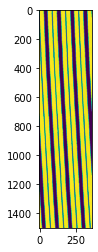

In [ ]:
#Convertin FMI_STAT and FMI_DYN to pandas dataframe and saving in csv
arr= f.object('CHANNEL', 'FMI_STAT').curves()
fmi_stat_df=pd.DataFrame(arr)
print(fmi_stat_df)
fmi_stat_df.to_csv('data_fmi_stat_run1.csv')
arr= f.object('CHANNEL', 'FMI_DYN').curves()
fmi_dyn_df=pd.DataFrame(arr)
print(fmi_dyn_df)
fmi_stat_df.to_csv('data_fmi_dyn_run1.csv')
print(arr.shape)
#plotting small region of FMI_DYN
plt.imshow(arr[8000:9500])

(642485, 360)


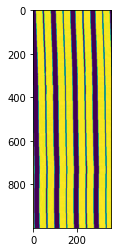

In [ ]:
arr= f.object('CHANNEL', 'FMI_DYN').curves()
print(arr.shape)
plt.imshow(arr[3999:4999])